In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [33]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
cnn = tf.keras.models.Sequential()

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [40]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [41]:
cnn.add(tf.keras.layers.Flatten())

In [42]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [43]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [44]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [45]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1439s 654ms/step - accuracy: 0.4179 - loss: 2.0548 - val_accuracy: 0.8642 - val_loss: 0.4335
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1306s 595ms/step - accuracy: 0.8431 - loss: 0.4974 - val_accuracy: 0.9206 - val_loss: 0.2465
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1247s 568ms/step - accuracy: 0.9064 - loss: 0.2898 - val_accuracy: 0.9240 - val_loss: 0.2426
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1220s 555ms/step - accuracy: 0.9347 - loss: 0.1994 - val_accuracy: 0.9425 - val_loss: 0.1819
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1223s 557ms/step - accuracy: 0.9531 - loss: 0.1417 - val_accuracy: 0.9504 - val_loss: 0.1551
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1274s 580ms/step - accuracy: 0.9619 - loss: 0.1138 - val_accuracy: 0.9559 - val_loss: 0.1373
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1302s 593ms/step - accuracy: 0.9683 - loss: 0.0942 - val_accuracy: 0.9571 - val_loss: 0.1388
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1314s 598ms/s

In [48]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 315s 143ms/step - accuracy: 0.9664 - loss: 0.1110
Training accuracy: 0.9677217602729797


In [49]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 79s 144ms/step - accuracy: 0.9340 - loss: 0.2375
Validation accuracy: 0.9353516697883606


In [50]:
cnn.save('trained_plant_disease_model.keras')

In [51]:
training_history.history

{'accuracy': [0.6171420216560364,
  0.8617398142814636,
  0.9131232500076294,
  0.9382032752037048,
  0.9536382555961609,
  0.9642364382743835,
  0.9696279764175415,
  0.9751049280166626,
  0.9777224659919739,
  0.9825592041015625],
 'loss': [1.297087550163269,
  0.43707799911499023,
  0.26841604709625244,
  0.18785756826400757,
  0.1404562145471573,
  0.10840282589197159,
  0.09190963208675385,
  0.0757649689912796,
  0.06794236600399017,
  0.05428246781229973],
 'val_accuracy': [0.8641588687896729,
  0.9205554127693176,
  0.9239699244499207,
  0.9425221681594849,
  0.9504324793815613,
  0.955895721912384,
  0.9570908546447754,
  0.9612451791763306,
  0.9663100242614746,
  0.9353516697883606],
 'val_loss': [0.43345531821250916,
  0.24654164910316467,
  0.24264030158519745,
  0.181858628988266,
  0.15505899488925934,
  0.1373041868209839,
  0.13880592584609985,
  0.12667813897132874,
  0.11055620014667511,
  0.2391657531261444]}

In [52]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [53]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


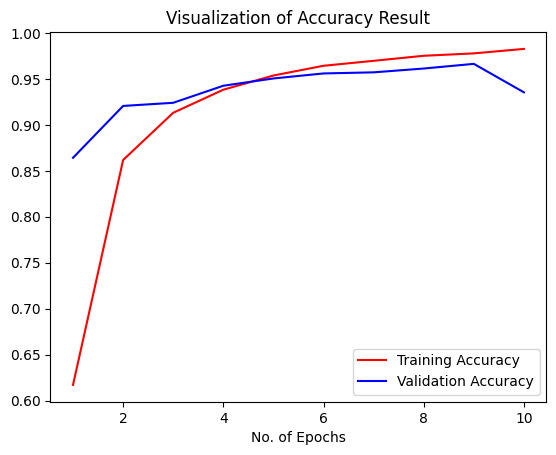

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [55]:
class_name = validation_set.class_names

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 229s 13ms/step


In [58]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [59]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [64]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.93      0.94       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.77      0.99      0.86       440
                                   Apple___healthy       0.96      0.94      0.95       502
                               Blueberry___healthy       0.94      0.96      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.86      0.93       421
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.75      0.82       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.77      0.99      0.

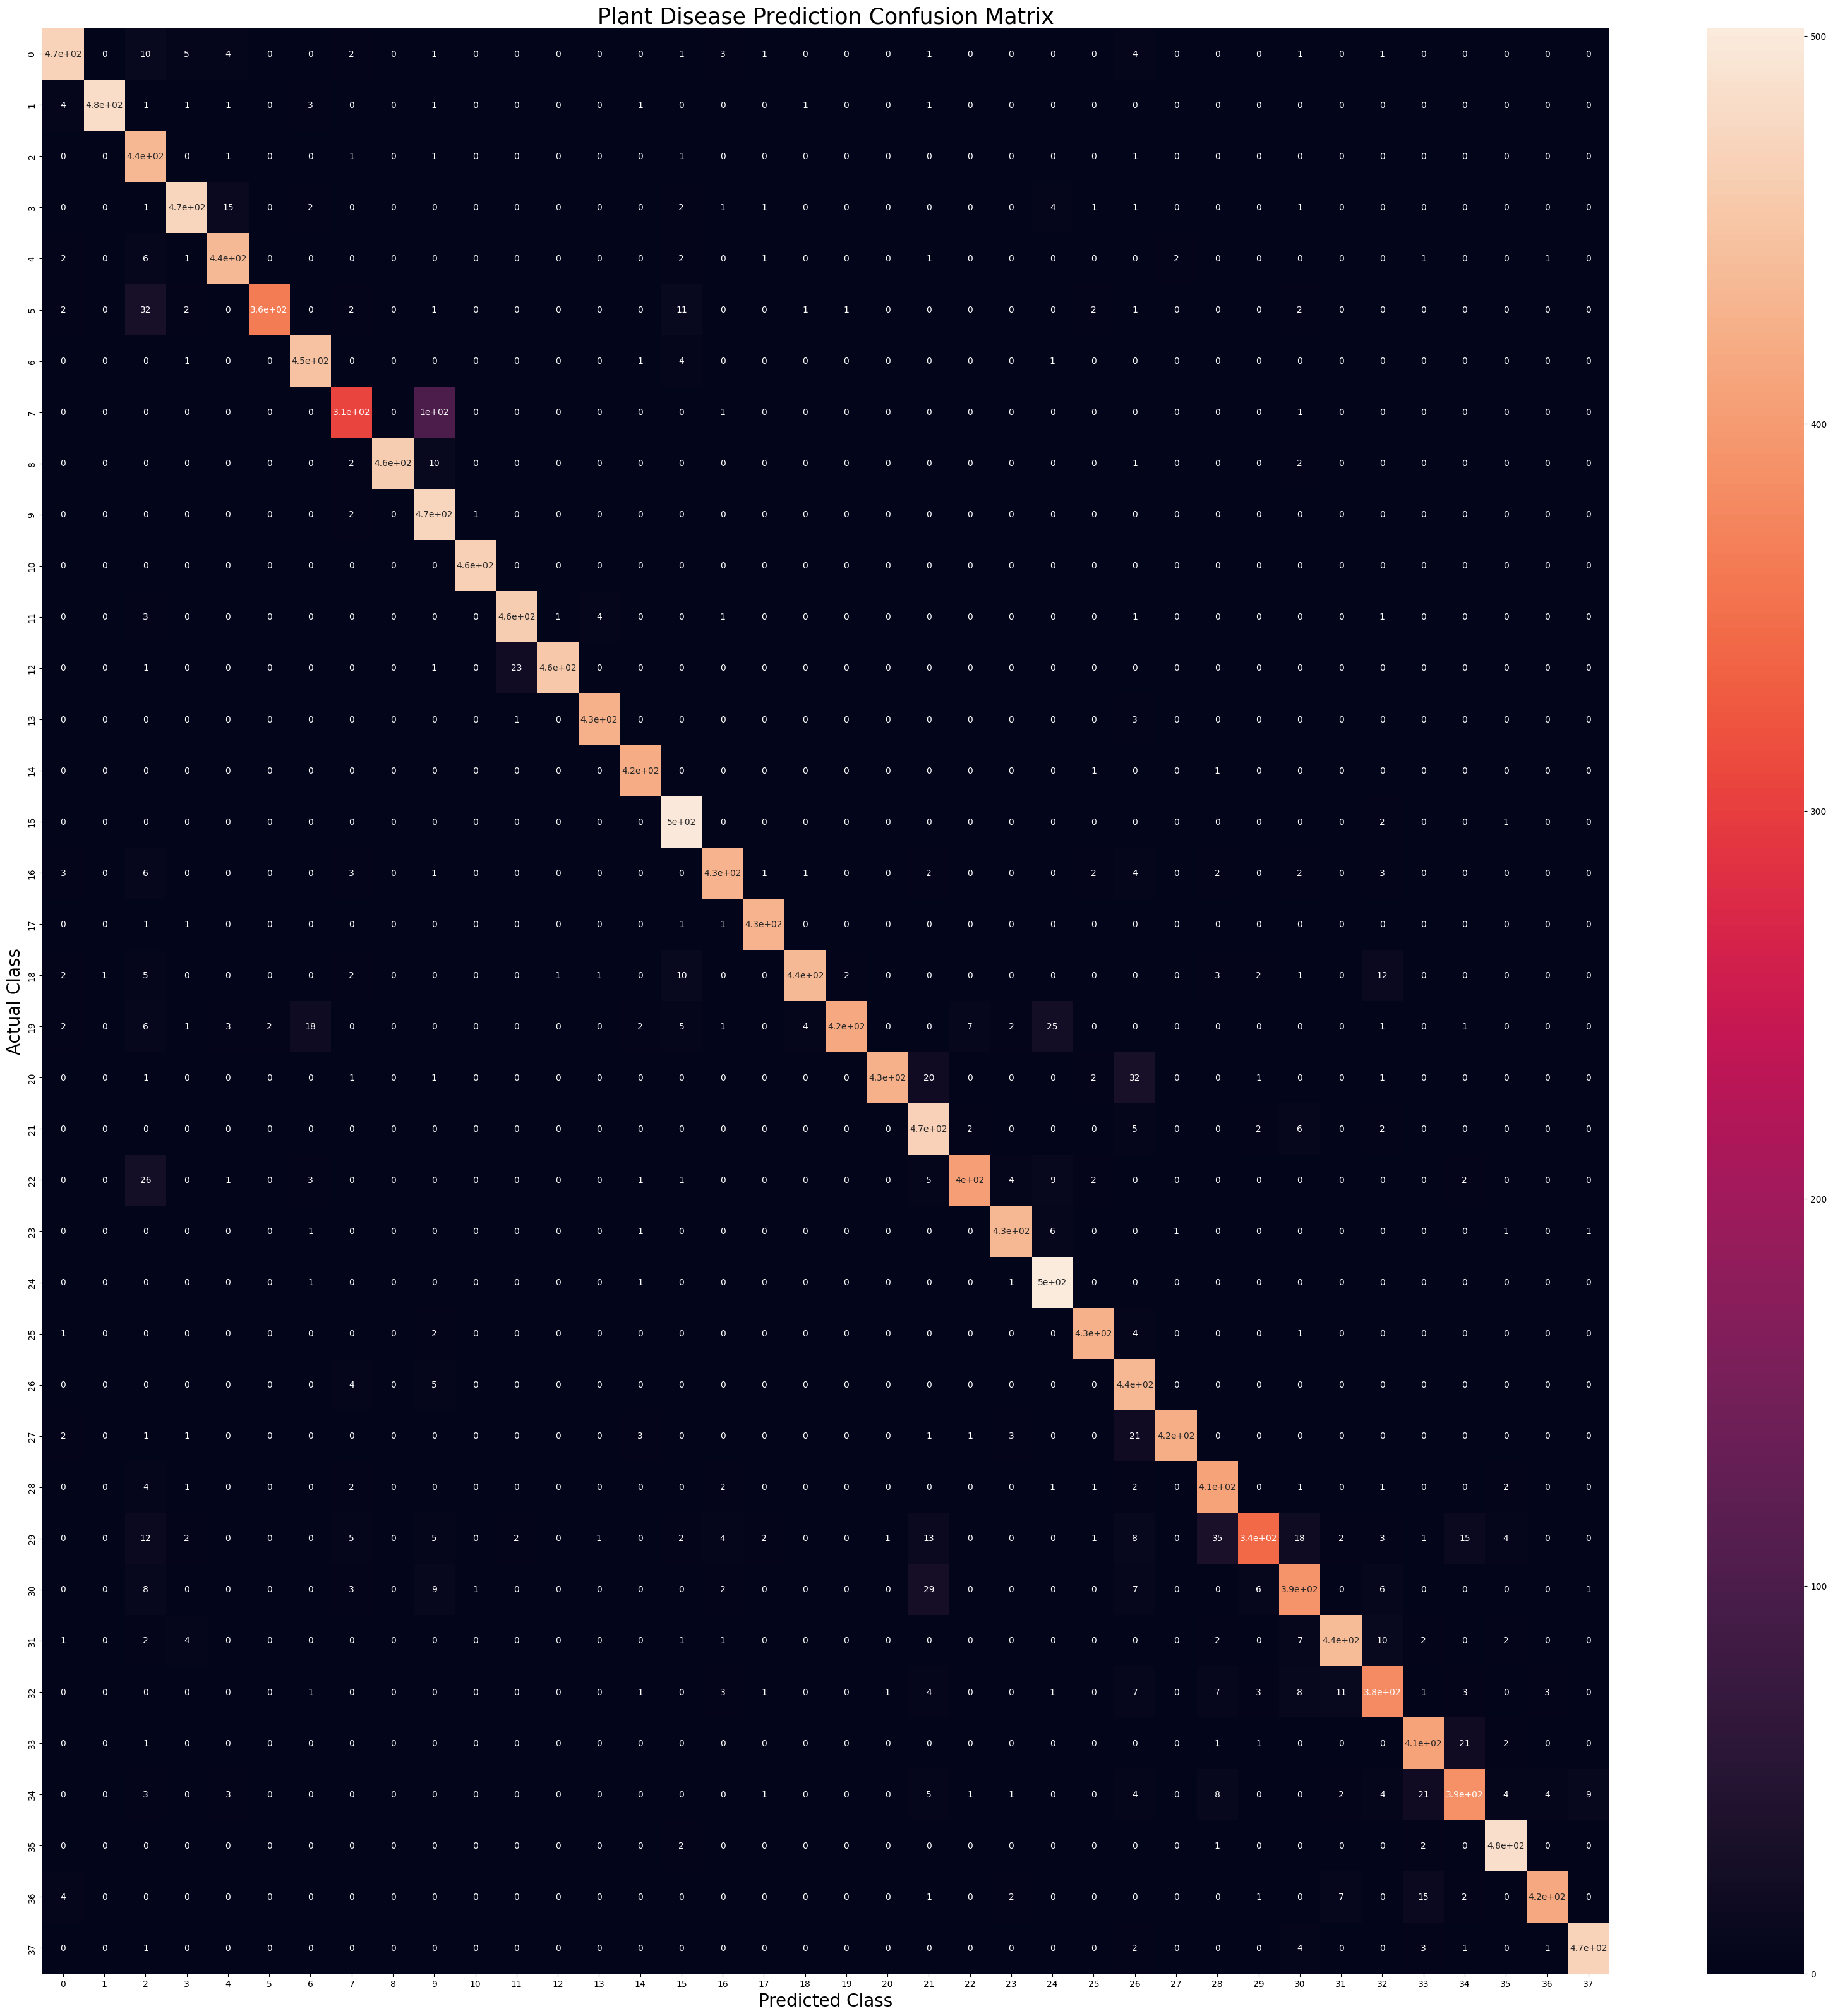

In [65]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()